# CellarTracker

Identifying evaluative language in wine tasting notes

Ling 583  
18 Jan 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cytoolz import concat
from wordcloud import WordCloud

pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 250)

%matplotlib inline

First off, we need to load the data:

In [2]:
df = pd.read_csv('http://bulba.sdsu.edu/cellartracker.csv.gz')
df

,review_points,review_text,review_time,review_userName,wine_name,wine_variant,wine_year
0,96,"Olive, horse sweat, dirty saddle, and smoke. This actually got quite a bit more spicy and expressive with significant aeration. This was a little dry on the palate first but filled out considerably in time, lovely, loaded with tapenade, leather, ...",2006-10-07,Eric,1981 Château de Beaucastel Châteauneuf-du-Pape,Red Rhone Blend,1981
1,93,"A remarkably floral nose with violet and chambord. On the palate this is super sweet and pure with a long, somewhat searing finish. My notes are very terse, but this was a lovely wine.",2003-09-19,Eric,1995 Château Pichon-Longueville Baron,Red Bordeaux Blend,1995
2,92,"Fantastic wine! Blackberry, smoke, olive, stem, floral notes and bit of tar. This is one expressive nose for a young wine. Saturated palate. Juicy with black cherry notes playing with tar. Quite acidic and fresh. Very young. Terrific character on...",2007-11-25,Eric,2001 Thierry Allemand Cornas Reynard,Syrah,2001
3,96,"Much more yeasty, very Krug-like (guessed blind but sort of obvious), some interesting notes of mushroom dancing in the background. The initial palate impression was clean, lacy and precise. However, as I kept revisiting this what struck me was a...",2005-12-10,Eric,1990 Krug Champagne Brut,Champagne Blend,1990
4,92,"This shows a very ripe nose with chalky notes. The palate shows lemon, stone and unreal acidity. This is totally dry and focused like a laser. Thinking about it provokes a Pavlovian reaction, as this one was that mouthwatering. Very different fro...",2004-04-25,Eric,2002 Weingut Hirsch Grüner Veltliner Kammern,Grüner Veltliner,2002
...,...,...,...,...,...,...,...
1035481,93,"Excellent interpretation of a Mersault. The color was pale gold, not yet a hue of straw, the nose was fruity and fresh. The palate was delicious, a touch of flint and just the right amount of acidity. Very balanced - soft yet dry. Our table loved...",2011-12-01,MFC,2003 Hospices de Beaune Meursault Cuvée Loppin Marc Rougeot-Dupin,Chardonnay,2003
1035482,92,"OK, so Argentina likes to grow their malbecs for varietal specific consumption. In France, they like to blend their malbecs in very small amounts (with cab and merlot - think Bordeaux). In fact, this grape is indigenous to France, and is the main...",2011-07-27,MFC,2006 Château Lagrezette Cahors Cru d'Exception,Malbec,2006
1035483,94,"Wow! This is a big Barolo - the bouquet upon opening had lots of red fruit, and later developed the signature hints of tobacco and earth you would expect. Very tight for the first hour, it could have used three+ hours of decanting to improve IMHO...",2011-07-14,MFC,1996 Pio Cesare Barolo Ornato,Nebbiolo,1996
1035484,91,"Opened six bottles, all drank very nicely - Wine has great structure, with tannins having softened. Very well balanced, though some '02 red Burgognes have elevated acidity, which still need time in bottle to mellow. The nose is classic Pommard, a...",2011-06-29,MFC,2002 Louis Jadot Pommard 1er Cru Les Épenots,Pinot Noir,2002


The `describe` method prints some summary statistics for any numeric columns:

In [3]:
df.describe()

,review_points,wine_year
count,1.04e+06,1.04e+06
mean,8.92e+01,2.00e+03
std,3.96e+00,6.92e+00
min,5.00e+01,1.72e+03
25%,8.70e+01,2.00e+03
50%,9.00e+01,2.00e+03
75%,9.20e+01,2.01e+03
max,1.00e+02,2.01e+03


In [4]:
df['review_points'].mean()

89.214772580218366

Checking on the date ranges:

In [5]:
df['review_time'].min(), df['review_time'].max()

('1970-01-01', '2012-10-14')

That's suspicious... reviews posted to a website in 1970?  Checking the data, though, it looks like almost all of them are notes that were written long before they were posted.

In [6]:
df[df['review_time'] < '1975']

,review_points,review_text,review_time,review_userName,wine_name,wine_variant,wine_year
80647,78,"keith shared notes from his cellar book. good red color, soft at the rim, fruity aroma. still considerable tannin- full fruity flavor. shades of beaujolais? a little short on breed but overall a good wine. (this was a half bottle)",1971-01-23,bacchus,1962 Château Lynch-Bages,Red Bordeaux Blend,1962
80727,90,"i believe we shared this wine with norman and elaine stokes. what great memories. great wine, great people, good times.",1973-10-01,bacchus,1967 Château Figeac,Red Bordeaux Blend,1967
80750,75,"keith shared notes from his cellar book. good red color, quite dark, although watery at the edge. little, possibly slightly sharp, nose: not attractive. acidic to the palate-drinkable, but not really very good. overall, a disappointment.",1971-05-15,bacchus,1964 Château Palmer,Red Bordeaux Blend,1964
80822,90,one of the first wines that pat and i enjoyed together. i think we bought a case of this. it was a great wine and a great value. have to see what they are up to these days. i believe ownership has changed.,1973-04-01,bacchus,1966 Caves Dom Teodosio Vinho Regional Ribatejano Serradayres,"Periquita Blend, Castelão",1966
81107,90,"at the time that i purchased and drank this wine, i had no idea how important the winemaker was and what his place in american viticultural history would be. the designation ""red wine"" on the label offers no indication of the varietal and whether...",1970-02-01,bacchus,1968 Boordy Vineyards,Red Blend,1968
...,...,...,...,...,...,...,...
81281,90,this note is being written after the fact. i was not keeping a cellar book then and it is too long ago to remember the details. it was memorable enough that the dead horse surives to this day.i seem to remember that this was the last vintage befo...,1972-01-01,bacchus,1966 Château Duhart-Milon,Red Bordeaux Blend,1966
81500,86,i bought this on the strength of the lichine name knowing nothing of the wine. reading the family history now indicates that this was apparently a wine of some substance. too bad i cannot recall the details of the tasting experience.,1973-01-01,bacchus,1970 Alexis Lichine Corton,Pinot Noir,1970
81613,90,this note is being written after the fact. consumed too long ago to recall details. i remember this wine as being extremely intense with a singular focus.,1973-01-01,bacchus,1961 Dessilani Fara,Bonarda,1961
429415,85,"Cherry, chocolate, burnt berries. Very light, good summer red, goes well with meat. Simple. Not pretending to be anything it's not.",1970-01-03,mjmiller1223,2008 Predator Zinfandel Old Vine,Zinfandel,2008


Some basic visualizations

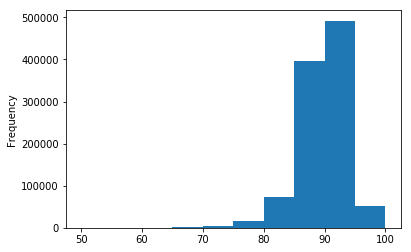

In [7]:
df['review_points'].plot.hist()

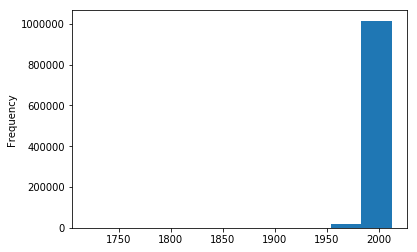

In [8]:
df['wine_year'].plot.hist()

----

So far we've been looking at the whole dataset.  Now let's break things down by kinds of wine.  First we can count the number of reviews for each variant:

In [9]:
df['wine_variant'].value_counts()

Pinot Noir            143767
Red Bordeaux Blend    126451
Cabernet Sauvignon    112976
Chardonnay             72368
Syrah                  51340
                       ...  
Juan Garcia                1
Tauberschwarz              1
Bombino, Trebbiano         1
Lydia                      1
Taminga                    1
Name: wine_variant, Length: 711, dtype: int64

And calculate the average score separately for each variant using `groupby`:

In [10]:
df.groupby('wine_variant')['review_points'].mean()

wine_variant
Abouriou          87.88
Acolon            81.33
Adakarasi         86.00
Agiorgitiko       86.83
Aglianico         88.81
                  ...  
Zétàt             91.00
Çalkarası         82.25
Öküzgözü          82.53
Šipon, Furmint    85.00
Žlahtina          87.00
Name: review_points, Length: 711, dtype: float64

And then sort in descending order:

In [11]:
df.groupby('wine_variant')['review_points'].mean().sort_values(ascending=False)

wine_variant
Pear-Apple Blend    95.00
Rosenmuskateller    94.50
Fetească Regală     94.00
Grain               94.00
Bacco               93.17
                    ...  
Tauberschwarz       74.00
Steuben             74.00
Delaware            73.00
Raspberry           72.33
Fortana             70.50
Name: review_points, Length: 711, dtype: float64

So "Pear-Apple Blend" is the best kind of wine?  Probably not.  It's more likely that there were very few reviews for Pear-Apple Blends, so the average score isn't very meaningful.  We'll get more interesting results if we look only at the variants that are represented by a reasonably large number of reviews.  For that, we'll need both average scores and counts for each variant:

In [12]:
variants = df.groupby('wine_variant')['review_points'].agg(['mean','count'])
variants

,mean,count
wine_variant,,
Abouriou,87.88,8
Acolon,81.33,3
Adakarasi,86.00,1
Agiorgitiko,86.83,281
Aglianico,88.81,2152
...,...,...
Zétàt,91.00,1
Çalkarası,82.25,4
Öküzgözü,82.53,17


Then we can filter variants by number of reviews (`variant['count']`) and average the scores: 

In [13]:
variants[variants['count']>10000]['mean'].sort_values(ascending=False)

wine_variant
Sémillon-Sauvignon Blanc Blend    90.47
Nebbiolo                          90.40
Syrah                             89.95
Red Bordeaux Blend                89.95
Cabernet Sauvignon                89.74
                                  ...  
Zinfandel                         88.66
Red Blend                         88.19
Merlot                            88.04
Sauvignon Blanc                   88.03
Malbec                            87.48
Name: mean, Length: 17, dtype: float64

----

Now let's look at the language used in the tasting notes.  First some bad wines:

In [14]:
df[df['review_points']<60]

,review_points,review_text,review_time,review_userName,wine_name,wine_variant,wine_year
859,50,"Tasted at Patrick's single blind 1999 Washington tasting. This wine has a remarkably intense nose of volatile acidity and grape bubble gum. A dry finish. This was flawed and undrinkable, the unanimous worst wine of the night.",2003-12-07,Eric,1999 Shellback Klipsun Vineyard,Red Blend,1999
5377,50,"undrinkable again. I am not sure if the bottles I have are spoiled or if this is just that awful, but two sips was all I could take before pouring the rest down the drain.",2006-01-29,EricBe,2002 Martinelli Gewürztraminer Dry Select Martinelli Vineyard,Gewürztraminer,2002
5456,55,"Blech - while the basics of the wine are fine, the 15.3% alcohol is just overpowering. It's like drinking gasoline - I couldn't finish my glass. Not corked, not vinegar, just way out of whack with the alcohol. It shouldn't burn going down like wh...",2005-07-11,EricBe,2002 Martinelli Gewürztraminer Dry Select Martinelli Vineyard,Gewürztraminer,2002
11134,55,"One of the worst wines I have had...ever. This was EXACTLY like red lemonade. No exaggeration. This wine was tart, sweet and grossly acidic. I am starting to think this SProject thing isn't for me.",2006-07-16,CO CHRIS,2002 Scholium Project Proserpina Maldonado Los Olivos,Cabernet Sauvignon,2002
12617,51,"Saturated medium yellow color; oak nose; nasty entry that turns to bitter, terrible finish (old vine Chenin Blanc aged in small oak barrels)",2004-04-03,Richard Jennings,2000 Chappellet Vineyard Old Vine Cuvée,White Blend,2000
...,...,...,...,...,...,...,...
1024570,55,"Bad news bears. Imagine crushing lemons and cranberries into a pot, then boiling it down to a weird extract. Toss in a few lemon drop candies, take a piss in it, and put it in a bottle.I'd consider it a flawed bottle, but I've had similar experie...",2010-05-19,tourette,2006 Kaz Malbec Melodrama St. Olof Vineyards,Malbec,2006
1024636,50,"This is the single worst wine I've ever had. I don't mind 2 buck chuck. But I've only tried the Merlot, Cab, and Syrah in the past. They're not good, but drinkable. This was not. It was sweet and sour and unbalanced and every time I took another ...",2008-12-18,tourette,2008 Charles Shaw Valdiguié Nouveau,Valdiguié,2008
1028960,50,Light yellow colour. Very light citrus smell some bubbles. Tasted like a bad ice wine. Not my favorite and wouldn't buy again. Companion dumped down the sink.,2010-06-27,Pogostickcowboy,2007 JoieFarm A Noble Blend,White Blend,2007
1032249,51,"Bitter, very little substance or character. Doesn't even compare to a New Zealand Sav Blanc. Was a $5 bottle of wine that cost $30.50. Will never buy again!!!",2011-02-12,Anonymous,2008 Cakebread Cellars Sauvignon Blanc,Sauvignon Blanc,2008


And some good wines:

In [15]:
df[df['review_points']==100]

,review_points,review_text,review_time,review_userName,wine_name,wine_variant,wine_year
166,100,"Well hello wine of the night. OMFG, this is just crazy and totally off the charts. Loaded with chicory and graphite. I have no idea how such a young wine can be so expressive, complex and explosive. I was amazed at how open and rewarding this was...",2006-06-20,Eric,2000 Château Margaux,Red Bordeaux Blend,2000
199,100,"Rudy graciously added this eight bottle to the flight after seeing it on the restaurant list, and it stole the show in my opinion. Complex, round and delicious, it was an absolute revelation for me and one of three perfect wines in the evening in...",2005-02-12,Eric,1990 Domaine Jean-Louis Chave Hermitage Cuvée Cathelin,Syrah,1990
216,100,"AP#18 Oh my goodness. Words can do no justice to what was clearly the greatest white wine I have ever tasted. The three of us were transfixed by this tiny bottle of elixir for nearly 90 minutes, just slowly savoring, shaking our heads with every ...",2006-01-23,Eric,2002 Dönnhoff Oberhäuser Brücke Riesling Eiswein,Riesling,2002
365,100,"OMFG!!! The intensity and structure of this wine set a new benchmark for me in Châteauneuf-du-Pape. Sweet, pure, extracted, intense, this is like Châteauneuf-jam, and I loved every last sip of it! I have read in the past that some people complain...",2005-02-12,Eric,1998 Domaine du Pégaü Châteauneuf-du-Pape Cuvée da Capo,Red Rhone Blend,1998
495,100,"OMFG!!!! Dense, slightly pruney, powerful, brooding, dense again (hey, it was in my notes twice), spice-cake, this is utterly massive! In the mouth this is a wall of black fruit, lightly floral and then a note from my book: ""Who put the Pride Res...",2005-12-10,Eric,1995 Harlan Estate,Red Bordeaux Blend,1995
...,...,...,...,...,...,...,...
1029806,100,"This is the best red wine I've ever had. I love being the contrarian and in a flight with the '89 LMHB, '89HB, '90LMHB I had a preference for this wine. This was probably the most open of the flight. Also undoubtedly the most aromatically complex...",2012-09-15,Wine Canuck,1990 Château Haut-Brion,Red Bordeaux Blend,1990
1030288,100,"Utterly fantastic. We had two bottles with friends over dinner of rack of lamb. This couldn't be better. No need to cellar any longer, enjoy it now while you are alive and can appreciate it.",2011-10-05,woofy,2000 Château Latour Grand Vin,Red Bordeaux Blend,2000
1032004,100,Out of a 375. We didn't really give this baby time in the decanter. I'd suggest decanting for four or more hours... Last year my best experiences were opening in the morning and consuming at night. That being said the wine was still supernatural-...,2011-02-17,KCProper,2007 Dow Porto Vintage,Port Blend,2007
1032041,100,"Stunning! A vinous IPA aged in Chardonnay barrels. I loved Russian River Brewery's Temptation, a sour beer aged at length in Chardonnay barrels, so I thought this might be worth trying. I did not regret it! Definitely drink this out of a snifter ...",2011-07-23,KCProper,2011 Evil Twin Brewing Disco Beer,Malt,2011


The first steps in processing text are **normalization** and **tokenization**.  For this task, normalization means stripping out punctuation (`str.replace(r'(\W|\d)+', ' ')`) and numbers and making everything lowercase (`str.lower()`).  To get tokens we'll then divide the string up by spaces (`str.split()`) and add the result as a new column in our dataframe called `bow` (for "bag of words"). 

`'Olive, horse sweat, dirty saddle, and smoke. This actually got quite a bit more spicy and expressive with significant aeration.'`

$\downarrow$ lowercase

`'olive, horse sweat, dirty saddle, and smoke. this actually got quite a bit more spicy and expressive with significant aeration.'`

$\downarrow$ remove punctuation and numbers

`'olive  horse sweat  dirty saddle  and smoke  this actually got quite a bit more spicy and expressive with significant aeration '`

$\downarrow$ split at spaces

`['olive', 'horse', 'sweat', 'dirty', 'saddle', 'and', 'smoke', 'this', 'actually', 'got', 'quite', 'a', 'bit', 'more', 'spicy', 'and', 'expressive', 'with', 'significant', 'aeration']`


In [16]:
df['bow'] = df['review_text'].str.lower().str.replace(r'(\W|\d)+', ' ').str.split()
df

,review_points,review_text,review_time,review_userName,wine_name,wine_variant,wine_year,bow
0,96,"Olive, horse sweat, dirty saddle, and smoke. This actually got quite a bit more spicy and expressive with significant aeration. This was a little dry on the palate first but filled out considerably in time, lovely, loaded with tapenade, leather, ...",2006-10-07,Eric,1981 Château de Beaucastel Châteauneuf-du-Pape,Red Rhone Blend,1981,"[olive, horse, sweat, dirty, saddle, and, smoke, this, actually, got, quite, a, bit, more, spicy, and, expressive, with, significant, aeration, this, was, a, little, dry, on, the, palate, first, but, filled, out, considerably, in, time, lovely, l..."
1,93,"A remarkably floral nose with violet and chambord. On the palate this is super sweet and pure with a long, somewhat searing finish. My notes are very terse, but this was a lovely wine.",2003-09-19,Eric,1995 Château Pichon-Longueville Baron,Red Bordeaux Blend,1995,"[a, remarkably, floral, nose, with, violet, and, chambord, on, the, palate, this, is, super, sweet, and, pure, with, a, long, somewhat, searing, finish, my, notes, are, very, terse, but, this, was, a, lovely, wine]"
2,92,"Fantastic wine! Blackberry, smoke, olive, stem, floral notes and bit of tar. This is one expressive nose for a young wine. Saturated palate. Juicy with black cherry notes playing with tar. Quite acidic and fresh. Very young. Terrific character on...",2007-11-25,Eric,2001 Thierry Allemand Cornas Reynard,Syrah,2001,"[fantastic, wine, blackberry, smoke, olive, stem, floral, notes, and, bit, of, tar, this, is, one, expressive, nose, for, a, young, wine, saturated, palate, juicy, with, black, cherry, notes, playing, with, tar, quite, acidic, and, fresh, very, y..."
3,96,"Much more yeasty, very Krug-like (guessed blind but sort of obvious), some interesting notes of mushroom dancing in the background. The initial palate impression was clean, lacy and precise. However, as I kept revisiting this what struck me was a...",2005-12-10,Eric,1990 Krug Champagne Brut,Champagne Blend,1990,"[much, more, yeasty, very, krug, like, guessed, blind, but, sort, of, obvious, some, interesting, notes, of, mushroom, dancing, in, the, background, the, initial, palate, impression, was, clean, lacy, and, precise, however, as, i, kept, revisitin..."
4,92,"This shows a very ripe nose with chalky notes. The palate shows lemon, stone and unreal acidity. This is totally dry and focused like a laser. Thinking about it provokes a Pavlovian reaction, as this one was that mouthwatering. Very different fro...",2004-04-25,Eric,2002 Weingut Hirsch Grüner Veltliner Kammern,Grüner Veltliner,2002,"[this, shows, a, very, ripe, nose, with, chalky, notes, the, palate, shows, lemon, stone, and, unreal, acidity, this, is, totally, dry, and, focused, like, a, laser, thinking, about, it, provokes, a, pavlovian, reaction, as, this, one, was, that,..."
...,...,...,...,...,...,...,...,...
1035481,93,"Excellent interpretation of a Mersault. The color was pale gold, not yet a hue of straw, the nose was fruity and fresh. The palate was delicious, a touch of flint and just the right amount of acidity. Very balanced - soft yet dry. Our table loved...",2011-12-01,MFC,2003 Hospices de Beaune Meursault Cuvée Loppin Marc Rougeot-Dupin,Chardonnay,2003,"[excellent, interpretation, of, a, mersault, the, color, was, pale, gold, not, yet, a, hue, of, straw, the, nose, was, fruity, and, fresh, the, palate, was, delicious, a, touch, of, flint, and, just, the, right, amount, of, acidity, very, balance..."
1035482,92,"OK, so Argentina likes to grow their malbecs for varietal specific consumption. In France, they like to blend their malbecs in very small amounts (with cab and merlot - think Bordeaux). In fact, this grape is indigenous to France, and is the main...",2011-07-27,MFC,2006 Château Lagrezette Cahors Cru d'Exception,Malbec,2006,"[ok, so, argentina, likes, to, grow, their, malbecs, for, varietal, specific, consumption, in, france, the

To find evaluative language, we'll want to use **pointwise mutual information** to find words that occur in a subset of review texts with greater than chance frequency:

$$PMI(w, subset)=\log_2\frac{f(w, subset)\times N}{f(w)\times N(subset)}$$

To calculate this, we need the frequency of a word in a subset $f(w, subset)$, the overall frequency of a word $f(w)$, the number of words in a subset $N(subset)$, and the total number of words $N$.  

First, count overall frequencies:

In [17]:
f = pd.DataFrame({'all': pd.value_counts(list(concat(df['bow'])))})
f

,all
and,2120912
the,2045098
a,1732499
of,1264342
with,1060227
...,...
monthsbottle,1
riiicola,1
fwotn,1
drymedium,1


And add a column with word counts in reviews of bad wine (with scores less than 60 points):

In [18]:
f['bad'] = pd.value_counts(list(concat(df[df['review_points']<60]['bow'])))
f

,all,bad
and,2120912,734.0
the,2045098,1202.0
a,1732499,823.0
of,1264342,622.0
with,1060227,257.0
...,...,...
monthsbottle,1,NaN
riiicola,1,NaN
fwotn,1,NaN
drymedium,1,NaN


Finally, calculate PMI:

In [19]:
f['bad_pmi'] = np.log2( (f['bad'] * np.sum(f['all'])) / 
                        (f['all'] * np.sum(f['bad'])) )

And sort:

In [20]:
f['bad_pmi'].sort_values(ascending=False)

gainormous      10.74
reykjavic       10.74
nyet            10.74
yeek            10.74
kaeden          10.74
                ...  
monthsbottle      NaN
riiicola          NaN
fwotn             NaN
drymedium         NaN
noteceably        NaN
Name: bad_pmi, Length: 169060, dtype: float64

Okay, so, we've got the same problem we had with average scores for variants.  We're getting extreme PMI values for very rare words, which isn't terribly informative:

In [21]:
f.loc['sproject']

all         1.00
bad         1.00
bad_pmi    10.74
Name: sproject, dtype: float64

And the solution is the same. We'll filter out all the words with a frequency below some threshold:

In [22]:
f['bad_pmi'][f['all']>25].sort_values(ascending=False)

refund       8.74
vile         8.39
putrid       8.21
revolting    7.79
yuk          7.57
             ... 
monnot        NaN
cherrries     NaN
briliant      NaN
amethyst      NaN
engel         NaN
Name: bad_pmi, Length: 18243, dtype: float64

And put the whole thing into a word cloud.  People love word clouds!

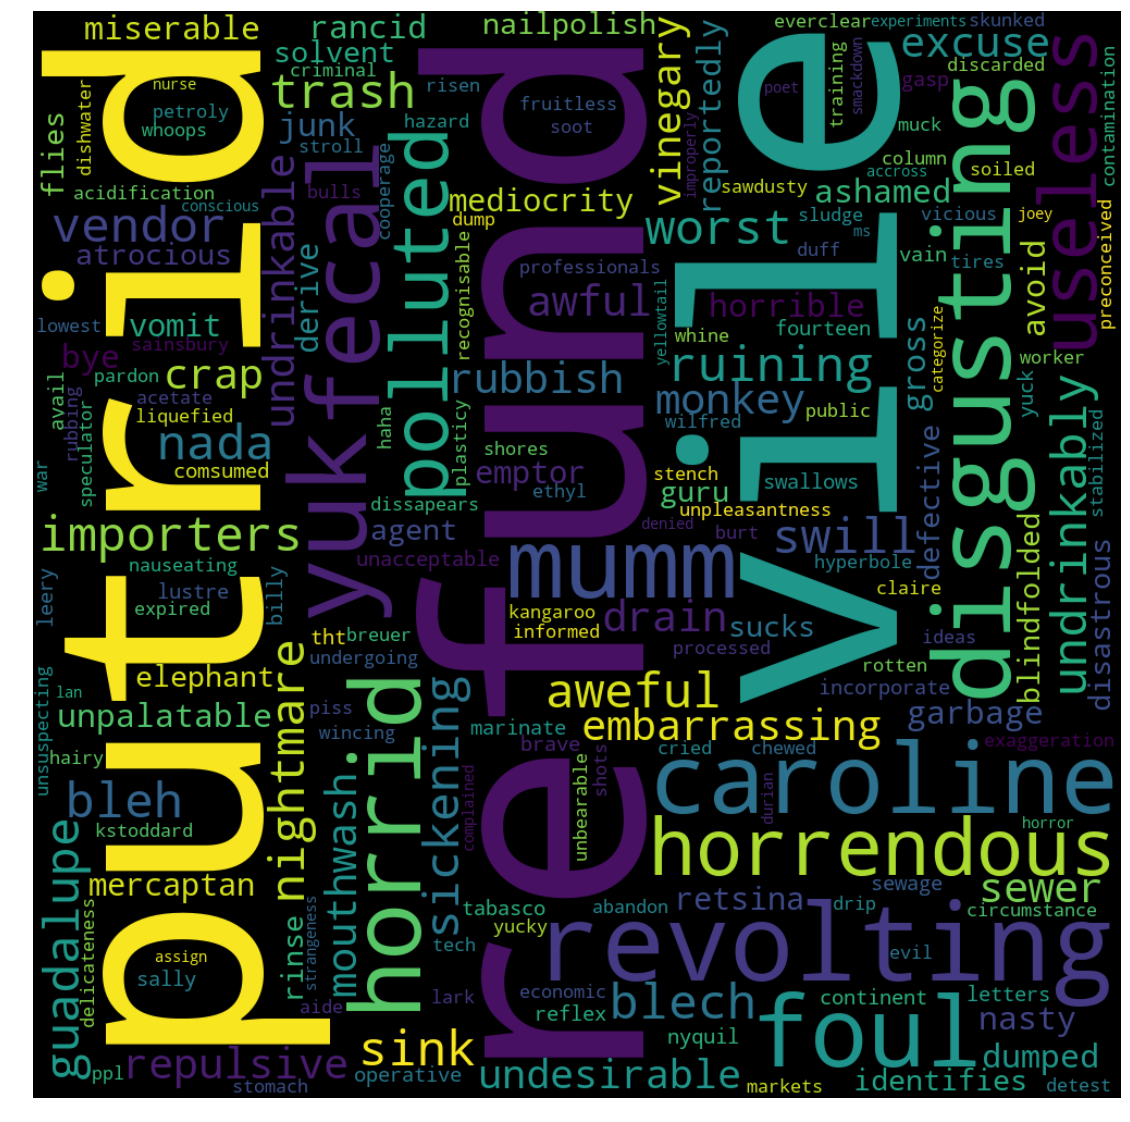

In [23]:
v = dict(f['bad_pmi'][f['all']>25].sort_values(ascending=False)[:200])
i = WordCloud(width=1000,height=1000).generate_from_frequencies(v).to_image()
plt.figure(figsize=(20,20))
plt.imshow(i,interpolation='bilinear')
plt.axis('off')
plt.show()

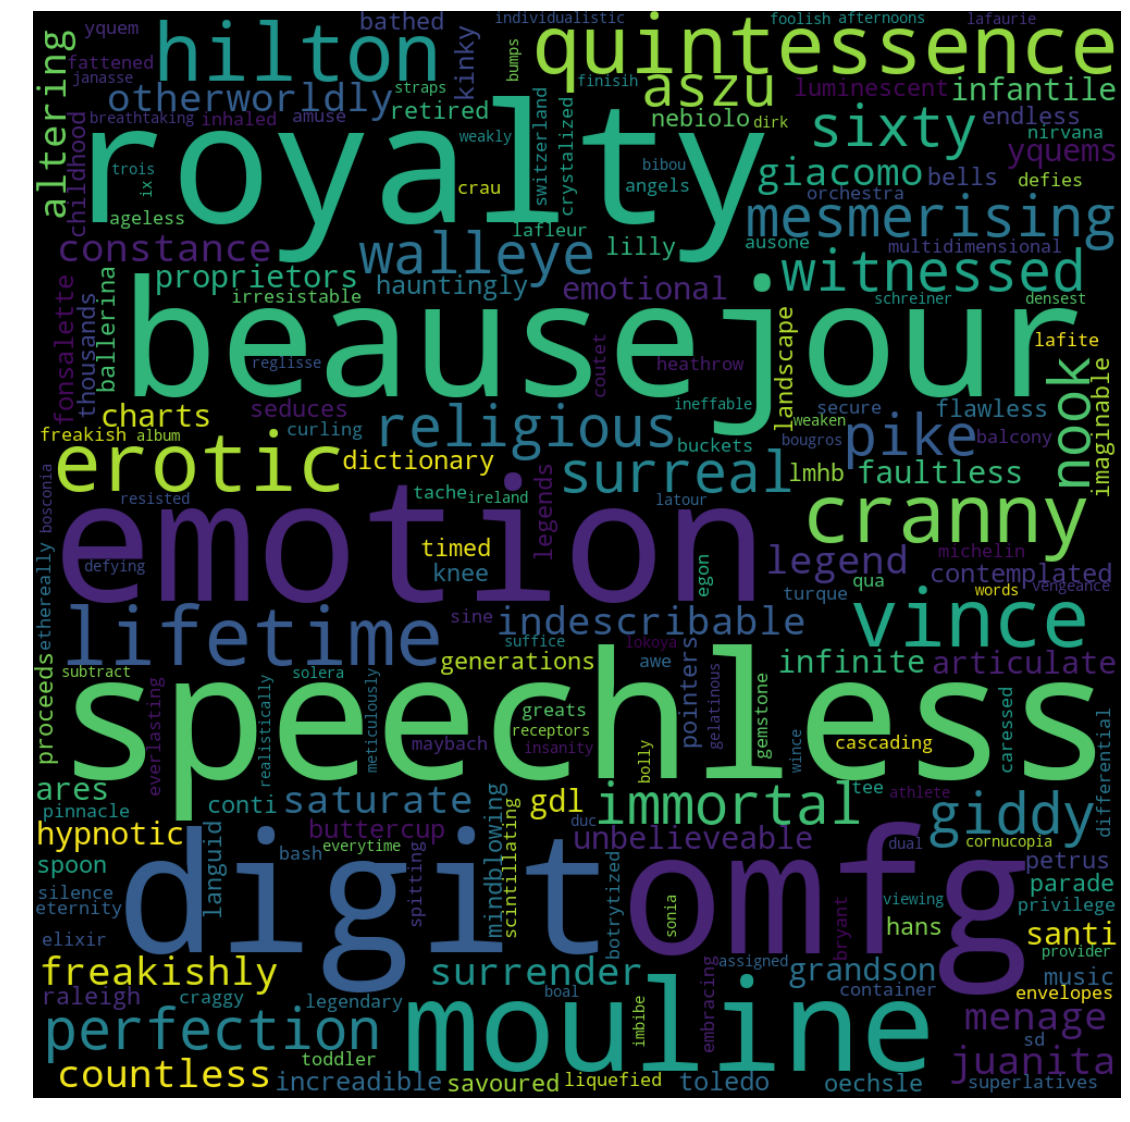

In [24]:
f['good'] = pd.value_counts(list(concat(df[df['review_points']==100]['bow'])))
f['good_pmi'] = np.log2( (f['good'] * np.sum(f['all'])) / 
                         (f['all'] * np.sum(f['good'])) )

v = dict(f['good_pmi'][f['all']>25].sort_values(ascending=False)[:200])
i = WordCloud(width=1000,height=1000).generate_from_frequencies(v).to_image()
plt.figure(figsize=(20,20))
plt.imshow(i,interpolation='bilinear')
plt.axis('off')
plt.show()